# Import the dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Path to dataset files: /kaggle/input/telco-customer-churn


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data cleaning

In [ ]:
df.drop(columns=["customerID"], inplace=True) #customerID is useless for learning patterns.
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(0, inplace=True)

/tmp/ipython-input-2972918845.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(0, inplace=True)


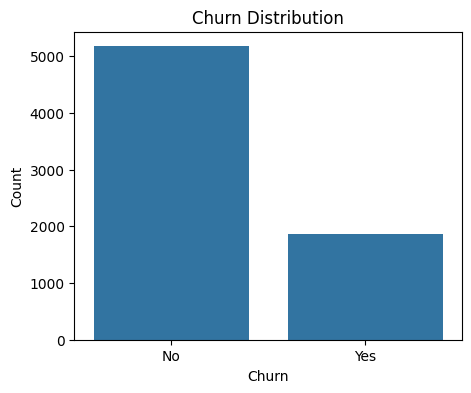

In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

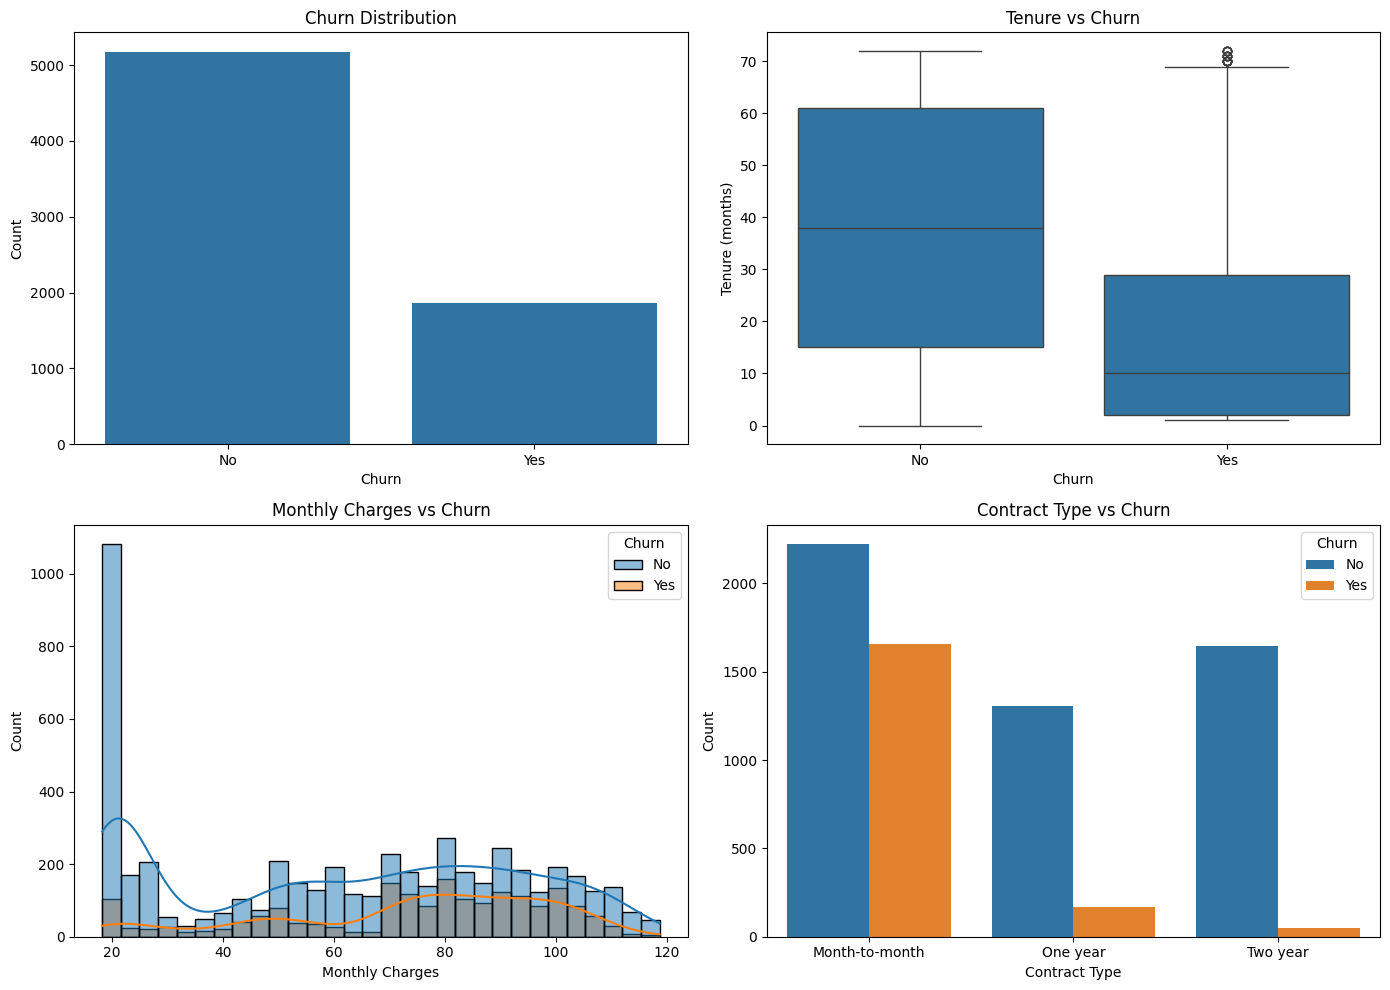

In [ ]:
plt.figure(figsize=(14, 10))

# Churn distribution
plt.subplot(2, 2, 1)
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")

# Tenure vs Churn
plt.subplot(2, 2, 2)
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.xlabel("Churn")
plt.ylabel("Tenure (months)")

# MonthlyCharges vs Churn
plt.subplot(2, 2, 3)
sns.histplot(data=df, x="MonthlyCharges", hue="Churn", bins=30, kde=True)
plt.title("Monthly Charges vs Churn")
plt.xlabel("Monthly Charges")
plt.ylabel("Count")

# Contract type vs Churn
plt.subplot(2, 2, 4)
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Contract Type vs Churn")
plt.xlabel("Contract Type")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [ ]:
X = df.drop("Churn", axis=1)
y = df["Churn"].map({"Yes": 1, "No": 0})

In [ ]:
#identify the categorical and numeric coloumns (essential for OneHotEncoding)

categorical_cols = X.select_dtypes(include="object").columns
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns

In [ ]:
print(len(categorical_cols))
print(len(numeric_cols))

15
4


In [ ]:
print(categorical_cols)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


# Train - test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols)
    ],
    remainder="drop"
)


In [ ]:
X_train = preprocessor.fit_transform(X_train)
X_test  = preprocessor.transform(X_test)

#After preprocessing, X_train / X_test are numeric matrices, not DataFrames.

In [ ]:
assert X_train.shape[1] == X_test.shape[1]

In [ ]:
y_train.value_counts()
before_counts = pd.Series(y_train).value_counts().sort_index()

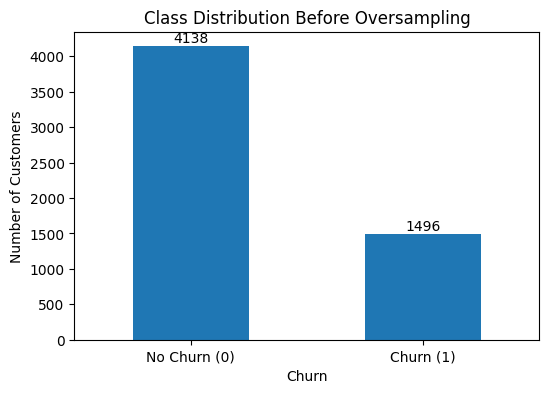

In [ ]:
class_counts = pd.Series(y_train).value_counts().sort_index()

plt.figure(figsize=(6, 4))
class_counts.plot(kind="bar")
plt.xticks([0, 1], ["No Churn (0)", "Churn (1)"], rotation=0)
plt.ylabel("Number of Customers")
plt.title("Class Distribution Before Oversampling")

for i, v in enumerate(class_counts):
    plt.text(i, v + 50, str(v), ha="center")

plt.show()

# Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()
after_counts = pd.Series(y_train).value_counts().sort_index()

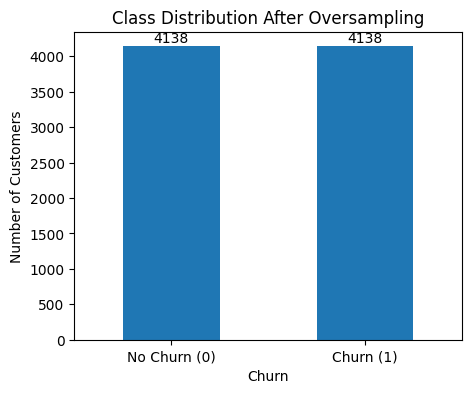

In [ ]:
smote_counts = pd.Series(y_train).value_counts().sort_index()

plt.figure(figsize=(5, 4))
smote_counts.plot(kind="bar")
plt.xticks([0, 1], ["No Churn (0)", "Churn (1)"], rotation=0)
plt.ylabel("Number of Customers")
plt.title("Class Distribution After Oversampling")

for i, v in enumerate(smote_counts):
    plt.text(i, v + 50, str(v), ha="center")

plt.show()


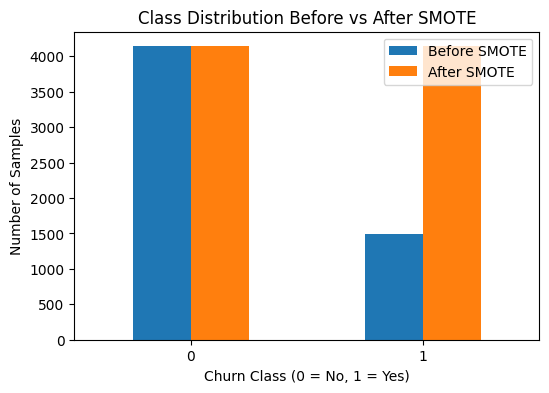

In [ ]:
counts_df = pd.DataFrame({
    "Before SMOTE": before_counts,
    "After SMOTE": after_counts
})

# Plot
counts_df.plot(kind="bar", figsize=(6, 4))
plt.title("Class Distribution Before vs After SMOTE")
plt.xlabel("Churn Class (0 = No, 1 = Yes)")
plt.ylabel("Number of Samples")
plt.xticks(rotation=0)
plt.show()


# Logistic Regression model training

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    max_iter=1000,
    random_state=42
)

log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

## Visualization of the sigmoid curve

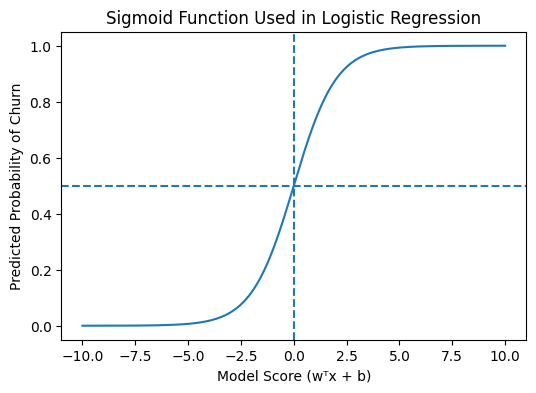

In [ ]:
z = np.linspace(-10, 10, 300)
sigmoid = 1 / (1 + np.exp(-z))

plt.figure(figsize=(6, 4))
plt.plot(z, sigmoid)
plt.axhline(0.5, linestyle="--")
plt.axvline(0, linestyle="--")
plt.xlabel("Model Score (wᵀx + b)")
plt.ylabel("Predicted Probability of Churn")
plt.title("Sigmoid Function Used in Logistic Regression")
plt.show()

## Model prediction

In [ ]:
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1] #binary classification, predict_proba() returns a 2D array
# each row looks like: [ P(class = 0), P(class = 1) ]

## Model evaluation

In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)


Confusion Matrix:
[[754 282]
 [ 64 309]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1036
           1       0.52      0.83      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.75      0.77      1409

ROC-AUC Score: 0.86096892564721


### Visualization of the confusion matrix

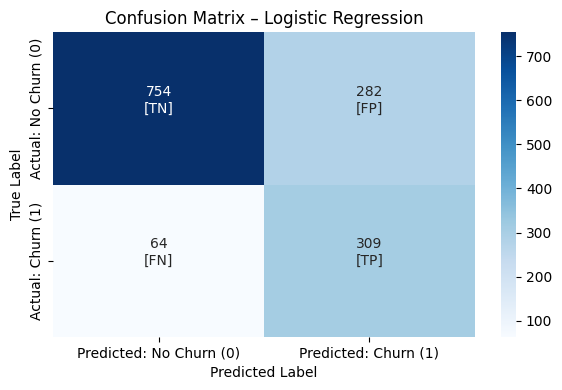

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Custom labels for each cell
labels = np.array([
    ["[TN]\n",  #loyal customers correctly ignored
     "[FP]\n"],  # Loyal customers wrongly flagged
    ["[FN]\n",  #Churners Missed
     "[TP]\n"]  #Churners caught
])


# Combine counts + labels
annot = np.empty_like(cm).astype(str)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annot[i, j] = f"{cm[i, j]}\n{labels[i, j]}"

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=annot,
    fmt="",
    cmap="Blues",
    xticklabels=["Predicted: No Churn (0)", "Predicted: Churn (1)"],
    yticklabels=["Actual: No Churn (0)", "Actual: Churn (1)"]
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Logistic Regression")
plt.tight_layout()
plt.show()



### Visualisation of ROC-AUC

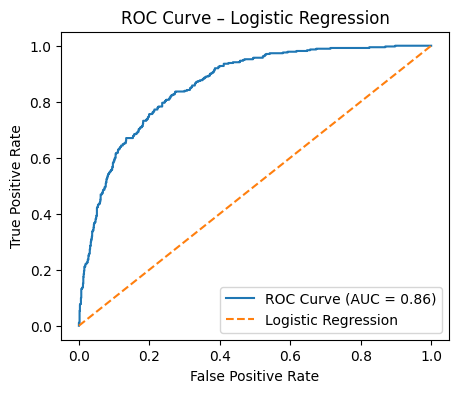

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression")
plt.legend()
plt.show()


## Interpretation of logistic regression coefficients

In [ ]:
import pandas as pd
import numpy as np

feature_names = preprocessor.get_feature_names_out()

coefficients = log_reg.coef_[0]

coef_df = (
    pd.DataFrame({
        "Feature": feature_names,
        "Coefficient": coefficients
    })
    .sort_values(by="Coefficient", ascending=False)
)

coef_df["Abs_Coefficient"] = coef_df["Coefficient"].abs()
coef_df = coef_df.sort_values("Abs_Coefficient", ascending=False)


In [ ]:
top_features = coef_df.head(16)

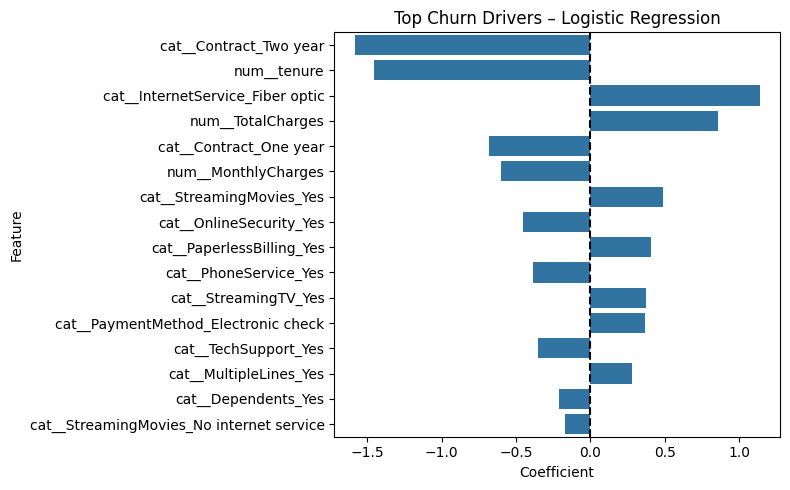

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=top_features,
    x="Coefficient",
    y="Feature"
)
plt.axvline(0, linestyle="--", color="black")
plt.title("Top Churn Drivers – Logistic Regression")
plt.tight_layout()
plt.show()


# Random Forest Model training

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight=None   # SMOTE already handled imbalance
)

rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

## Model prediction

In [ ]:
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

## Model evaluation

In [ ]:
print("Random Forest – Confusion Matrix")
print(confusion_matrix(y_test, y_pred_rf))

print("\nRandom Forest – Classification Report")
print(classification_report(y_test, y_pred_rf))

print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


Random Forest – Confusion Matrix
[[892 144]
 [149 224]]

Random Forest – Classification Report
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1036
           1       0.61      0.60      0.60       373

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409

Random Forest ROC-AUC: 0.8402613164677509


### Visualisation of the confusion matrix

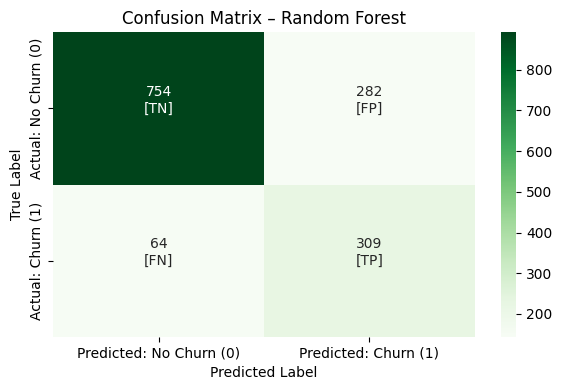

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Custom labels for each cell
labels = np.array([
    ["[TN]\n",  #loyal customers correctly ignored
     "[FP]\n"],  # Loyal customers wrongly flagged
    ["[FN]\n",  #Churners Missed
     "[TP]\n"]  #Churners caught
])


# Combine counts + labels
annot = np.empty_like(cm_rf).astype(str)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annot[i, j] = f"{cm[i, j]}\n{labels[i, j]}"

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm_rf,
    annot=annot,
    fmt="",
    cmap="Greens",
    xticklabels=["Predicted: No Churn (0)", "Predicted: Churn (1)"],
    yticklabels=["Actual: No Churn (0)", "Actual: Churn (1)"]
)

plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


### Visualisation of ROC-AUC

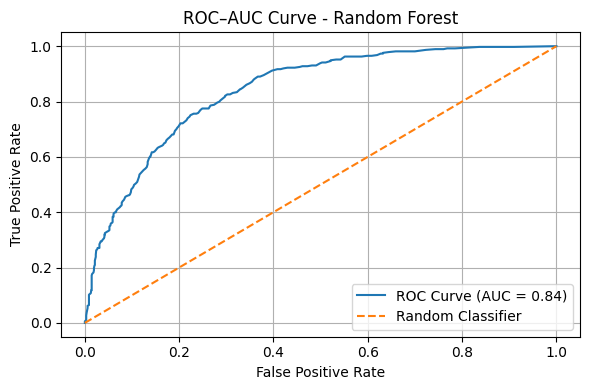

In [ ]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f"ROC Curve (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC–AUC Curve - Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Random forest feature importance

In [ ]:
rf_importances = rf.feature_importances_
feature_names = preprocessor.get_feature_names_out()

rf_importance_df = (
    pd.DataFrame({
        "Feature": feature_names,
        "Importance": rf_importances
    })
    .sort_values(by="Importance", ascending=False)
)

rf_importance_df.head(10)

,Feature,Importance
1,num__tenure,0.144584
3,num__TotalCharges,0.141258
2,num__MonthlyCharges,0.122528
25,cat__Contract_Two year,0.064112
28,cat__PaymentMethod_Electronic check,0.056426
13,cat__OnlineSecurity_Yes,0.049128
26,cat__PaperlessBilling_Yes,0.037382
24,cat__Contract_One year,0.037236
10,cat__InternetService_Fiber optic,0.035355
19,cat__TechSupport_Yes,0.030114


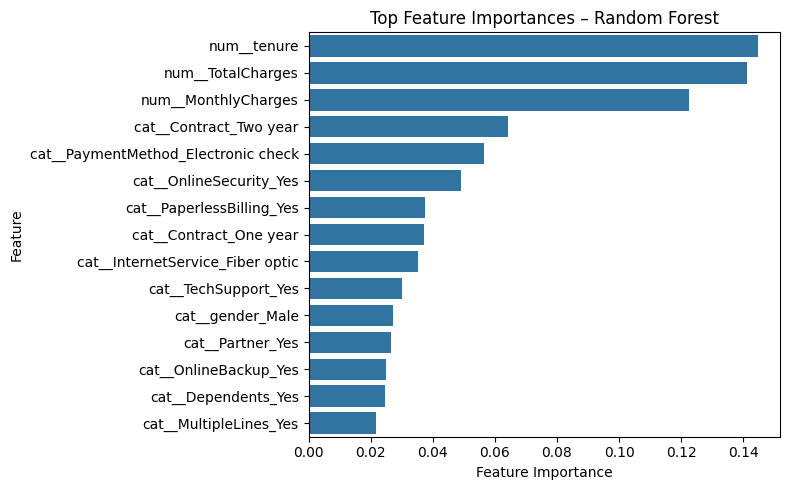

In [ ]:
top_rf_features = rf_importance_df.head(15)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=top_rf_features,
    x="Importance",
    y="Feature"
)
plt.title("Top Feature Importances – Random Forest")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Comparison of metrics of both models

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_rf)
    ],
    "Precision": [
        precision_score(y_test, y_pred),
        precision_score(y_test, y_pred_rf)
    ],
    "Recall": [
        recall_score(y_test, y_pred),
        recall_score(y_test, y_pred_rf)
    ],
    "F1-score": [
        f1_score(y_test, y_pred),
        f1_score(y_test, y_pred_rf)
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, y_prob),
        roc_auc_score(y_test, y_prob_rf)
    ]
})

comparison_df


,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,Logistic Regression,0.754436,0.522843,0.828418,0.641079,0.860969
1,Random Forest,0.792051,0.608696,0.600536,0.604588,0.840261


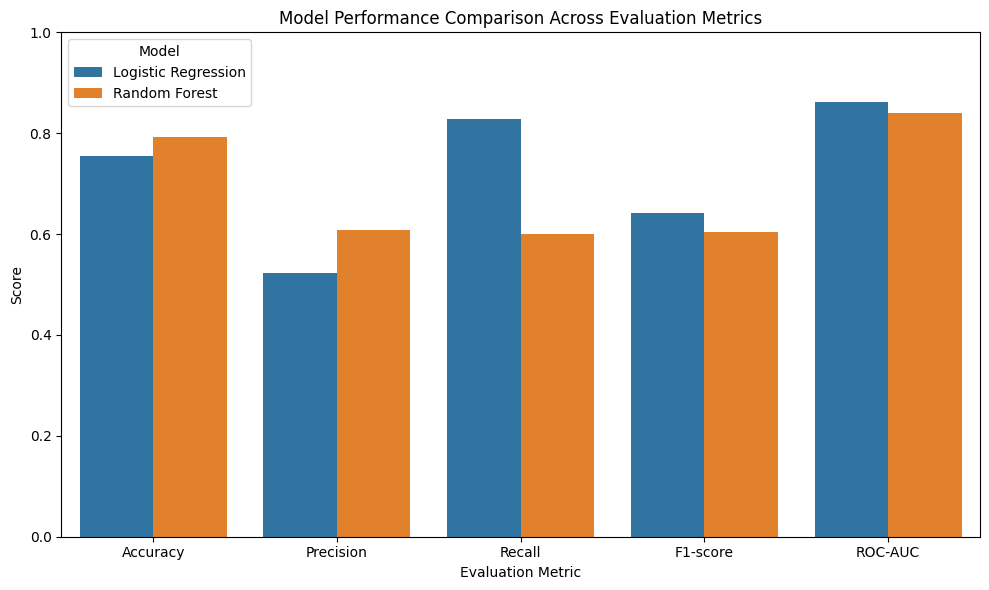

In [ ]:
comparison_melted = comparison_df.melt(
    id_vars="Model",
    var_name="Metric",
    value_name="Score"
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=comparison_melted,
    x="Metric",
    y="Score",
    hue="Model"
)

plt.ylim(0, 1)
plt.title("Model Performance Comparison Across Evaluation Metrics")
plt.ylabel("Score")
plt.xlabel("Evaluation Metric")
plt.legend(title="Model")
plt.tight_layout()
plt.show()